In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import scipy
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.pca import PCA

In [2]:
train_df = pd.read_csv('WikiLarge_Train.csv')
test_df = pd.read_csv('WikiLarge_Test.csv')

In [3]:
train_df['original_text']

0         There is manuscript evidence that Austen conti...
1         In a remarkable comparative analysis , Mandaea...
2         Before Persephone was released to Hermes , who...
3         Cogeneration plants are commonly found in dist...
4         Geneva -LRB- , ; , ; , ; ; -RRB- is the second...
                                ...                        
416763    A Duke Nukem 3D version has been sold for Xbox...
416764    However , it is becoming replaced as a method ...
416765    There are hand gestures in both Hindu and Budd...
416766    If it is necessary to use colors , try to choo...
416767                                 Calgary Stampeders ,
Name: original_text, Length: 416768, dtype: object

# Experimenting

In [4]:
train_df['label'] == 0

0         False
1         False
2         False
3         False
4         False
          ...  
416763     True
416764     True
416765     True
416766     True
416767     True
Name: label, Length: 416768, dtype: bool

In [5]:
test = train_df.iloc[0:2]

test['original_text'].apply(lambda x: pd.Series(list(x)))

,0,1,2,3,4,5,6,7,8,9,...,205,206,207,208,209,210,211,212,213,214
0,T,h,e,r,e,,i,s,,m,...,,a,s,,1,8,1,4,,.
1,I,n,,a,,r,e,m,a,r,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#for x in train_df:
#    label = train_df['label']
#    characters = train_df['original_text'].apply(lambda x: pd.Series(list(x)))
    
                                   

In [7]:
from collections import Counter

counts = Counter()

for sentence in train_df['original_text']:
    counts.update(word.strip('.,?!"\'').lower() for word in sentence.split())
    
counts.most_common()

[('', 965833),
 ('the', 571030),
 ('of', 289724),
 ('in', 253301),
 ('and', 209492),
 ('a', 194645),
 ('is', 164001),
 ('to', 124342),
 ('-rrb-', 105264),
 ('-lrb-', 104977),
 ('was', 82557),
 ('as', 62590),
 ('for', 55865),
 ('on', 54013),
 ('by', 53708),
 ('it', 52211),
 ('with', 42239),
 ('s', 38873),
 ('from', 38134),
 ('that', 37480),
 ('an', 36160),
 ('he', 35292),
 ('are', 34646),
 ('or', 32356),
 ('at', 30998),
 ('his', 27820),
 ('which', 23557),
 (':', 21901),
 ('also', 20837),
 ('first', 19487),
 ('has', 19430),
 ('be', 19190),
 (';', 18672),
 ('born', 18669),
 ('one', 18141),
 ('this', 16830),
 ('were', 16802),
 ('france', 16694),
 ('city', 16135),
 ('its', 15489),
 ('who', 14545),
 ('they', 14281),
 ('united', 14068),
 ('department', 13927),
 ('other', 13856),
 ('not', 13852),
 ('known', 13650),
 ('after', 13553),
 ('have', 13009),
 ('their', 12525),
 ('but', 12475),
 ('states', 12449),
 ('new', 12387),
 ('region', 12281),
 ('commune', 12066),
 ('-', 11927),
 ('most', 11870

In [8]:
#train_df['Day1'].apply(lambda x: pd.Series(list(x))

In [9]:
import sys
import numpy as np # generic mathematics
import pandas as pd # handling tabular data
import matplotlib.pyplot as plt # basic plots
import seaborn as sns # more complex plots
from statsmodels.multivariate.pca import PCA

In [10]:
train_df

,original_text,label
0,There is manuscript evidence that Austen conti...,1
1,"In a remarkable comparative analysis , Mandaea...",1
2,"Before Persephone was released to Hermes , who...",1
3,Cogeneration plants are commonly found in dist...,1
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1
...,...,...
416763,A Duke Nukem 3D version has been sold for Xbox...,0
416764,"However , it is becoming replaced as a method ...",0
416765,There are hand gestures in both Hindu and Budd...,0
416766,"If it is necessary to use colors , try to choo...",0


# Logistic regression

In [11]:
vectorizer = TfidfVectorizer(min_df=2, norm='l2', stop_words='english')
X = vectorizer.fit_transform(train_df['original_text'])#[200383:216383])

#X_train = train_df['original_text']
y = train_df['label']#[200383:216383]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train

<279234x109206 sparse matrix of type '<class 'numpy.float64'>'
	with 2885949 stored elements in Compressed Sparse Row format>

In [12]:
y_train

177028    1
247412    0
367065    0
290981    0
250426    0
         ..
185836    1
163234    1
92373     1
414292    0
60481     1
Name: label, Length: 279234, dtype: int64

In [13]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score


clf = LogisticRegression(solver='lbfgs', multi_class='auto')
#clf.fit(X_train[0:10000], y_train[0:10000])
clf.fit(X_train, y_train)

#X_dev = vectorizer.transform(dev_df['bio'])
#y_dev = list(dev_df.nationality)

# dummy classifier for testing purposes
dummy_clf_uniform = DummyClassifier(strategy="uniform")
dummy_clf_uniform.fit(X_train, y_train)

dummy_clf_frequent = DummyClassifier(strategy="most_frequent")
dummy_clf_frequent.fit(X_train, y_train)

lr_tiny_preds = clf.predict(X_test)
rand_preds = dummy_clf_uniform.predict(X_test)
mf_preds = dummy_clf_frequent.predict(X_test)

lr_f1 = f1_score(y_test, lr_tiny_preds, average='macro')
rand_f1 = f1_score(y_test, rand_preds, average='macro')
mf_f1 = f1_score(y_test, mf_preds, average='macro')

print(lr_f1)
print(rand_f1)
print(mf_f1)

0.6596102573406868
0.5019919102613546
0.33323960595718277


# Creating new features

In [14]:
len(train_df['original_text'][0])

215

In [15]:
train_df['character_count']  = train_df['original_text'].str.len()
train_df

,original_text,label,character_count
0,There is manuscript evidence that Austen conti...,1,215
1,"In a remarkable comparative analysis , Mandaea...",1,154
2,"Before Persephone was released to Hermes , who...",1,248
3,Cogeneration plants are commonly found in dist...,1,246
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,201
...,...,...,...
416763,A Duke Nukem 3D version has been sold for Xbox...,0,79
416764,"However , it is becoming replaced as a method ...",0,111
416765,There are hand gestures in both Hindu and Budd...,0,64
416766,"If it is necessary to use colors , try to choo...",0,216


In [16]:
import numpy as np
train_df['avg_word_length'] = train_df['original_text'].apply(lambda x: np.mean([len(w) for w in x.split()]))
train_df

,original_text,label,character_count,avg_word_length
0,There is manuscript evidence that Austen conti...,1,215,4.023256
1,"In a remarkable comparative analysis , Mandaea...",1,154,5.739130
2,"Before Persephone was released to Hermes , who...",1,248,4.413043
3,Cogeneration plants are commonly found in dist...,1,246,5.333333
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,201,4.611111
...,...,...,...,...
416763,A Duke Nukem 3D version has been sold for Xbox...,0,79,3.705882
416764,"However , it is becoming replaced as a method ...",0,111,4.600000
416765,There are hand gestures in both Hindu and Budd...,0,64,4.909091
416766,"If it is necessary to use colors , try to choo...",0,216,4.166667


In [17]:
train_df['longest_word_length'] = train_df['original_text'].apply(lambda x: np.max([len(w) for w in x.split()]))
train_df

,original_text,label,character_count,avg_word_length,longest_word_length
0,There is manuscript evidence that Austen conti...,1,215,4.023256,10
1,"In a remarkable comparative analysis , Mandaea...",1,154,5.739130,14
2,"Before Persephone was released to Hermes , who...",1,248,4.413043,11
3,Cogeneration plants are commonly found in dist...,1,246,5.333333,12
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,201,4.611111,20
...,...,...,...,...,...
416763,A Duke Nukem 3D version has been sold for Xbox...,0,79,3.705882,9
416764,"However , it is becoming replaced as a method ...",0,111,4.600000,9
416765,There are hand gestures in both Hindu and Budd...,0,64,4.909091,11
416766,"If it is necessary to use colors , try to choo...",0,216,4.166667,9


Counting stopwords

In [18]:
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
nltk.download('punkt')

x = 'this is a test and it will work'
word_tokens = word_tokenize(x)
test  = [w for w in word_tokens if w in stopwords.words('english')]

test

[nltk_data] Downloading package stopwords to /opt/conda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /opt/conda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['this', 'is', 'a', 'and', 'it', 'will']

In [19]:
from nltk.corpus import stopwords    
stop_words = set(stopwords.words('english'))

train_df['stopword_count'] = train_df['original_text'].apply(lambda x: len(set(x.split()) & stop_words))
train_df

,original_text,label,character_count,avg_word_length,longest_word_length,stopword_count
0,There is manuscript evidence that Austen conti...,1,215,4.023256,10,10
1,"In a remarkable comparative analysis , Mandaea...",1,154,5.739130,14,5
2,"Before Persephone was released to Hermes , who...",1,248,4.413043,11,13
3,Cogeneration plants are commonly found in dist...,1,246,5.333333,12,5
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,201,4.611111,20,7
...,...,...,...,...,...,...
416763,A Duke Nukem 3D version has been sold for Xbox...,0,79,3.705882,9,3
416764,"However , it is becoming replaced as a method ...",0,111,4.600000,9,8
416765,There are hand gestures in both Hindu and Budd...,0,64,4.909091,11,4
416766,"If it is necessary to use colors , try to choo...",0,216,4.166667,9,13


# logistic regression with new features

In [20]:
X = train_df[['character_count', 'avg_word_length', 'longest_word_length', 'stopword_count']]
y = train_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train

,character_count,avg_word_length,longest_word_length,stopword_count
379162,55,3.666667,10,4
356048,75,4.428571,10,2
14985,121,4.809524,9,1
129700,176,5.103448,15,5
91667,119,4.000000,10,5
...,...,...,...,...
273363,190,4.026316,9,13
89994,200,3.902439,11,12
287700,83,4.250000,11,5
265257,84,4.000000,10,3


In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

clf = LogisticRegression(solver='lbfgs', multi_class='auto')
clf.fit(X_train, y_train)

# dummy classifiers for testing purposes
dummy_clf_uniform = DummyClassifier(strategy="uniform")
dummy_clf_uniform.fit(X_train, y_train)

dummy_clf_frequent = DummyClassifier(strategy="most_frequent")
dummy_clf_frequent.fit(X_train, y_train)

#test_df['character_count']  = test_df['original_text'].str.len()
#test_df['avg_word_length'] = test_df['original_text'].apply(lambda x: np.mean([len(w) for w in x.split()]))

lr_tiny_preds = clf.predict(X_test)
rand_preds = dummy_clf_uniform.predict(X_test)
mf_preds = dummy_clf_frequent.predict(X_test)

lr_f1 = f1_score(y_test, lr_tiny_preds, average='macro')
rand_f1 = f1_score(y_test, rand_preds, average='macro')
mf_f1 = f1_score(y_test, mf_preds, average='macro')


print(lr_f1)
print(rand_f1)
print(mf_f1)

0.6222219807504513
0.49821851364812275
0.3324078343809917


# Neural network with new features

In [22]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping( monitor='val_loss', patience=30 )
lr_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=.5, patience=10, verbose=1 )

model.fit(X_train, y_train, epochs=5)

model.evaluate(X_test,  y_test, verbose=2)

Epoch 1/5

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

8727/8727 [==============================] - 8s 902us/step - loss: 0.7327 - accuracy: 0.6045
Epoch 2/5
8727/8727 [==============================] - 8s 890us/step - loss: 0.6459 - accuracy: 0.6161
Epoch 3/5
8727/8727 [==============================] - 8s 910us/step - loss: 0.6449 - accuracy: 0.6183
Epoch 4/5
8727/8727 [==============================] - 9s 1ms/step - loss: 0.6445 - accuracy: 0.6194
Epoch 5/5
8727/8727 [==============================] - 10s 1ms/step - loss: 0.6437 - accuracy: 0.6

[0.6431983709335327, 0.6226024031639099]

# Gunning fog index

In [24]:
import nltk
nltk.download('averaged_perceptron_tagger')

sentence = "I am named John Doe"
tagged_sentence = nltk.tag.pos_tag(sentence.split())
edited_sentence = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS']
print(' '.join(edited_sentence))

I am named


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /opt/conda/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [25]:
train_df['original_text']

0         There is manuscript evidence that Austen conti...
1         In a remarkable comparative analysis , Mandaea...
2         Before Persephone was released to Hermes , who...
3         Cogeneration plants are commonly found in dist...
4         Geneva -LRB- , ; , ; , ; ; -RRB- is the second...
                                ...                        
416763    A Duke Nukem 3D version has been sold for Xbox...
416764    However , it is becoming replaced as a method ...
416765    There are hand gestures in both Hindu and Budd...
416766    If it is necessary to use colors , try to choo...
416767                                 Calgary Stampeders ,
Name: original_text, Length: 416768, dtype: object

In [26]:
'''import nltk
nltk.download('averaged_perceptron_tagger')

train_df['text_no_prop_nouns']  = [word for word,tag in nltk.tag.pos_tag(train_df['original_text'].str.split()) if tag != 'NNP' and tag != 'NNPS']
#[w for w in word_tokenize(train_df['original_text']) if w in stopwords.words('english')]
train_df'''

"import nltk\nnltk.download('averaged_perceptron_tagger')\n\ntrain_df['text_no_prop_nouns']  = [word for word,tag in nltk.tag.pos_tag(train_df['original_text'].str.split()) if tag != 'NNP' and tag != 'NNPS']\n#[w for w in word_tokenize(train_df['original_text']) if w in stopwords.words('english')]\ntrain_df"

In [27]:
# exported to file

from tqdm import tqdm

counter = 0
train_df['text_no_prop_nouns'] = 0
for x in tqdm(train_df['original_text']):
    tagged_sentence = nltk.tag.pos_tag(x.split())
    edited_sentence = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS']
    train_df['text_no_prop_nouns'][counter] = ' '.join(edited_sentence)
    counter +=1

train_df

train_df_copy = train_df.copy()
train_df_copy.to_csv('train_df_no_prop_nouns.csv', index = False)

"from tqdm import tqdm\n\ncounter = 0\ntrain_df['text_no_prop_nouns'] = 0\nfor x in tqdm(train_df['original_text']):\n    tagged_sentence = nltk.tag.pos_tag(x.split())\n    edited_sentence = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS']\n    train_df['text_no_prop_nouns'][counter] = ' '.join(edited_sentence)\n    counter +=1\n\ntrain_df\n\ntrain_df_copy = train_df.copy()\ntrain_df_copy.to_csv('train_df_no_prop_nouns.csv', index = False)"

In [28]:
train_df_no_prop_nouns = pd.read_csv('train_df_no_prop_nouns.csv')

In [29]:
!pip install syllables

In [30]:
import syllables
syllables.estimate('exuberant')

4

In [31]:
# exported to file

train_df_no_prop_nouns['complex_word_count'] = 0
counter = 0
for x in tqdm(train_df_no_prop_nouns['text_no_prop_nouns']):
    complex_word_count = 0
    for word in x.split():
        syllable_count = syllables.estimate(word)
        if syllable_count >= 3:
            complex_word_count += 1
    train_df_no_prop_nouns['complex_word_count'][counter] = complex_word_count
    counter += 1
    
train_df_no_prop_nouns.to_csv('complex_word_count.csv', index = False)

"train_df_no_prop_nouns['complex_word_count'] = 0\ncounter = 0\nfor x in tqdm(train_df_no_prop_nouns['text_no_prop_nouns']):\n    complex_word_count = 0\n    for word in x.split():\n        syllable_count = syllables.estimate(word)\n        if syllable_count >= 3:\n            complex_word_count += 1\n    train_df_no_prop_nouns['complex_word_count'][counter] = complex_word_count\n    counter += 1\n    \ntrain_df_no_prop_nouns.to_csv('complex_word_count.csv', index = False)"

In [32]:
complex_word_count = pd.read_csv('complex_word_count.csv')
complex_word_count

,original_text,label,character_count,avg_word_length,longest_word_length,stopword_count,text_no_prop_nouns,complex_word_count
0,There is manuscript evidence that Austen conti...,1,215,4.023256,10,10,There is manuscript evidence that continued to...,4
1,"In a remarkable comparative analysis , Mandaea...",1,154,5.739130,14,5,"In a remarkable comparative analysis , scholar...",6
2,"Before Persephone was released to Hermes , who...",1,248,4.413043,11,13,"Before was released to , who had been sent to ...",6
3,Cogeneration plants are commonly found in dist...,1,246,5.333333,12,5,Cogeneration plants are commonly found in dist...,8
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,201,4.611111,20,7,", ; , ; , ; ; -RRB- is the second-most-populou...",2
...,...,...,...,...,...,...,...,...
416763,A Duke Nukem 3D version has been sold for Xbox...,0,79,3.705882,9,3,"A 3D version has been sold for since 24 , 2008 .",0
416764,"However , it is becoming replaced as a method ...",0,111,4.600000,9,8,"However , it is becoming replaced as a method ...",6
416765,There are hand gestures in both Hindu and Budd...,0,64,4.909091,11,4,There are hand gestures in both and iconography .,2
416766,"If it is necessary to use colors , try to choo...",0,216,4.166667,9,13,"If it is necessary to use colors , try to choo...",4


# Using textstat to extract stats from text

In [33]:
!pip install textstat

In [34]:
import textstat
test_data = (
    "Playing games has always been thought to be important to "
    "the development of well-balanced and creative children; "
    "however, what part, if any, they should play in the lives "
    "of adults has never been researched that deeply. I believe "
    "that playing games is every bit as important for adults "
    "as for children. Not only is taking time out to play games "
    "with our children and other adults valuable to building "
    "interpersonal relationships but is also a wonderful way "
    "to release built up tension."
)

textstat.flesch_reading_ease(test_data)
textstat.flesch_kincaid_grade(test_data)
textstat.smog_index(test_data)
textstat.coleman_liau_index(test_data)
textstat.automated_readability_index(test_data)
textstat.dale_chall_readability_score(test_data)
textstat.difficult_words(test_data)
textstat.linsear_write_formula(test_data)
textstat.gunning_fog(test_data)
textstat.text_standard(test_data)
textstat.fernandez_huerta(test_data)
textstat.szigriszt_pazos(test_data)
textstat.gutierrez_polini(test_data)
textstat.crawford(test_data)
textstat.gulpease_index(test_data)
textstat.osman(test_data)   
    

48.01

In [35]:
# exported to file

holder = 0
train_df_no_prop_nouns['flesch_kincaid_grade']=0
train_df_no_prop_nouns['smog_index'] = 0
train_df_no_prop_nouns['coleman_liau_index'] = 0
train_df_no_prop_nouns['automated_readability_index'] = 0
train_df_no_prop_nouns['dale_chall_readability_score'] = 0
train_df_no_prop_nouns['difficult_words'] = 0
train_df_no_prop_nouns['linsear_write_formula'] = 0
train_df_no_prop_nouns['gunning_fog'] = 0
train_df_no_prop_nouns['text_standard'] = 0
train_df_no_prop_nouns['fernandez_huerta'] = 0
train_df_no_prop_nouns['szigriszt_pazos'] = 0
train_df_no_prop_nouns['gutierrez_polini'] = 0
train_df_no_prop_nouns['crawford'] = 0
#train_df_no_prop_nouns['gulpease_index'] = 0
#train_df_no_prop_nouns['osman'] = 0

for x in tqdm(train_df_no_prop_nouns['original_text']):
    train_df_no_prop_nouns['flesch_kincaid_grade'][holder] = textstat.flesch_kincaid_grade(x)
    train_df_no_prop_nouns['smog_index'][holder] = textstat.smog_index(x)
    train_df_no_prop_nouns['coleman_liau_index'][holder] = textstat.coleman_liau_index(x)
    train_df_no_prop_nouns['automated_readability_index'][holder] = textstat.automated_readability_index(x)
    train_df_no_prop_nouns['dale_chall_readability_score'][holder] = textstat.dale_chall_readability_score(x)
    train_df_no_prop_nouns['difficult_words'][holder] = textstat.difficult_words(x)
    train_df_no_prop_nouns['linsear_write_formula'][holder] = textstat.linsear_write_formula(x)
    train_df_no_prop_nouns['gunning_fog'][holder] = textstat.gunning_fog(x)
    train_df_no_prop_nouns['text_standard'][holder] = textstat.text_standard(x)
    train_df_no_prop_nouns['fernandez_huerta'][holder] = textstat.fernandez_huerta(x)
    train_df_no_prop_nouns['szigriszt_pazos'][holder] = textstat.szigriszt_pazos(x)
    train_df_no_prop_nouns['gutierrez_polini'][holder] = textstat.gutierrez_polini(x)
    train_df_no_prop_nouns['crawford'][holder] = textstat.crawford(x)
    #train_df_no_prop_nouns['gulpease_index'][holder] = textstat.gulpease_index(x)
    #train_df_no_prop_nouns['osman'][holder] = textstat.osman(x)
    holder +=1
    
train_df_no_prop_nouns.to_csv('text_stats.csv', index = False)

"holder = 0\ntrain_df_no_prop_nouns['flesch_kincaid_grade']=0\ntrain_df_no_prop_nouns['smog_index'] = 0\ntrain_df_no_prop_nouns['coleman_liau_index'] = 0\ntrain_df_no_prop_nouns['automated_readability_index'] = 0\ntrain_df_no_prop_nouns['dale_chall_readability_score'] = 0\ntrain_df_no_prop_nouns['difficult_words'] = 0\ntrain_df_no_prop_nouns['linsear_write_formula'] = 0\ntrain_df_no_prop_nouns['gunning_fog'] = 0\ntrain_df_no_prop_nouns['text_standard'] = 0\ntrain_df_no_prop_nouns['fernandez_huerta'] = 0\ntrain_df_no_prop_nouns['szigriszt_pazos'] = 0\ntrain_df_no_prop_nouns['gutierrez_polini'] = 0\ntrain_df_no_prop_nouns['crawford'] = 0\n#train_df_no_prop_nouns['gulpease_index'] = 0\n#train_df_no_prop_nouns['osman'] = 0\n\nfor x in tqdm(train_df_no_prop_nouns['original_text']):\n    train_df_no_prop_nouns['flesch_kincaid_grade'][holder] = textstat.flesch_kincaid_grade(x)\n    train_df_no_prop_nouns['smog_index'][holder] = textstat.smog_index(x)\n    train_df_no_prop_nouns['coleman_liau_

In [36]:
text_stat_data = pd.read_csv('text_stats.csv')
text_stat_data

,original_text,label,character_count,avg_word_length,longest_word_length,stopword_count,text_no_prop_nouns,flesch_kincaid_grade,smog_index,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,text_standard,fernandez_huerta,szigriszt_pazos,gutierrez_polini,crawford
0,There is manuscript evidence that Austen conti...,1,215,4.023256,10,10,There is manuscript evidence that continued to...,14,0,8,19,12,7,26,20,14th and 15th grade,90,85,39,2
1,"In a remarkable comparative analysis , Mandaea...",1,154,5.739130,14,5,"In a remarkable comparative analysis , scholar...",13,0,18,18,15,9,16,17,17th and 18th grade,77,76,28,4
2,"Before Persephone was released to Hermes , who...",1,248,4.413043,11,13,"Before was released to , who had been sent to ...",17,0,10,22,11,9,27,20,10th and 11th grade,80,78,35,2
3,Cogeneration plants are commonly found in dist...,1,246,5.333333,12,5,Cogeneration plants are commonly found in dist...,18,0,19,25,14,14,25,20,19th and 20th grade,66,63,23,4
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,201,4.611111,20,7,", ; , ; , ; ; -RRB- is the second-most-populou...",13,0,12,20,9,5,21,12,12th and 13th grade,88,83,35,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416763,A Duke Nukem 3D version has been sold for Xbox...,0,79,3.705882,9,3,"A 3D version has been sold for since 24 , 2008 .",4,0,5,5,11,1,8,6,5th and 6th grade,119,117,50,1
416764,"However , it is becoming replaced as a method ...",0,111,4.600000,9,8,"However , it is becoming replaced as a method ...",11,0,11,11,9,4,15,13,11th and 12th grade,86,81,40,3
416765,There are hand gestures in both Hindu and Budd...,0,64,4.909091,11,4,There are hand gestures in both and iconography .,6,0,11,9,10,4,5,8,5th and 6th grade,106,103,40,1
416766,"If it is necessary to use colors , try to choo...",0,216,4.166667,9,13,"If it is necessary to use colors , try to choo...",8,0,7,9,8,6,12,9,8th and 9th grade,102,99,46,2


In [37]:
X = text_stat_data[['flesch_kincaid_grade','smog_index','coleman_liau_index','automated_readability_index','dale_chall_readability_score','difficult_words','linsear_write_formula','gunning_fog', 'fernandez_huerta','szigriszt_pazos','gutierrez_polini','crawford']]
y = text_stat_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping( monitor='val_loss', patience=30 )
lr_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=.5, patience=10, verbose=1 )

model.fit(X_train, y_train, epochs=5)

model.evaluate(X_test,  y_test, verbose=2)

Epoch 1/5
8727/8727 [==============================] - 12s 1ms/step - loss: 0.6853 - accuracy: 0.6396
Epoch 2/5
8727/8727 [==============================] - 11s 1ms/step - loss: 0.6296 - accuracy: 0.6493
Epoch 3/5
8727/8727 [==============================] - 11s 1ms/step - loss: 0.6281 - accuracy: 0.6500
Epoch 4/5
8727/8727 [==============================] - 11s 1ms/step - loss: 0.6271 - accuracy: 0.6510
Epoch 5/5
8727/8727 [==============================] - 11s 1ms/step - loss: 0.6275 - accuracy: 0.6504
4298/4298 - 3s - loss: 0.6233 - accuracy: 0.6553


[0.6233035922050476, 0.6552779674530029]

In [38]:
X = text_stat_data[['automated_readability_index', 'difficult_words', 'linsear_write_formula']]
y = text_stat_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  #tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adamax',
              loss=loss_fn,
              metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping( monitor='val_loss', patience=30 )
lr_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=.5, patience=10, verbose=1 )

model.fit(X_train, y_train, epochs=5)

model.evaluate(X_test,  y_test, verbose=2)

Epoch 1/5
10420/10420 [==============================] - 7s 715us/step - loss: 0.6707 - accuracy: 0.6437
Epoch 2/5
10420/10420 [==============================] - 7s 698us/step - loss: 0.6318 - accuracy: 0.64790s
Epoch 3/5
10420/10420 [==============================] - 7s 696us/step - loss: 0.6312 - accuracy: 0.6486
Epoch 4/5
10420/10420 [==============================] - 7s 669us/step - loss: 0.6302 - accuracy: 0.6487
Epoch 5/5
10420/10420 [==============================] - 7s 642us/step - loss: 0.6296 - accuracy: 0.6493
2605/2605 - 1s - loss: 0.6322 - accuracy: 0.6500


[0.6321556568145752, 0.6499627828598022]

# Testing on test set

In [39]:
test_df = pd.read_csv('WikiLarge_Test.csv')
#np.array(test_df)
test_df = test_df.drop(columns=['id', 'label'])

In [40]:
# exported to file

holder = 0

test_df['automated_readability_index'] = 0
test_df['difficult_words'] = 0
test_df['linsear_write_formula'] = 0

for x in tqdm(test_df['original_text']):
    test_df['automated_readability_index'][holder] = textstat.automated_readability_index(x)
    test_df['difficult_words'][holder] = textstat.difficult_words(x)
    test_df['linsear_write_formula'][holder] = textstat.linsear_write_formula(x)
    holder +=1

test_df.to_csv('test_df_added_features.csv', index = False)

"holder = 0\n\ntest_df['automated_readability_index'] = 0\ntest_df['difficult_words'] = 0\ntest_df['linsear_write_formula'] = 0\n\nfor x in tqdm(test_df['original_text']):\n    test_df['automated_readability_index'][holder] = textstat.automated_readability_index(x)\n    test_df['difficult_words'][holder] = textstat.difficult_words(x)\n    test_df['linsear_write_formula'][holder] = textstat.linsear_write_formula(x)\n    holder +=1\n    \ntest_df.to_csv('test_df_added_features.csv', index = False)"

In [41]:
test_df

,original_text
0,-2011
1,-2011
2,-2000
3,-1997
4,1.636
...,...
119087,#NAME?
119088,#NAME?
119089,#NAME?
119090,#NAME?


In [42]:
test_df_added_features = pd.read_csv('test_df_added_features.csv')

predictions = model.predict_classes(test_df_added_features[['automated_readability_index', 'difficult_words', 'linsear_write_formula']])
predictions

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([0, 0, 0, ..., 0, 0, 0])

In [43]:
for x in range(10):
    print(predictions[x])

0
0
0
0
0
0
0
0
0
0


In [44]:
# exported to file

pd.DataFrame(predictions).to_csv('predictions1.csv', index=True, index_label='id', header=['label'])

In [45]:
len(predictions)

119092

In [46]:
X = text_stat_data[['flesch_kincaid_grade','smog_index','coleman_liau_index','automated_readability_index','dale_chall_readability_score','difficult_words','linsear_write_formula','gunning_fog', 'fernandez_huerta','szigriszt_pazos','gutierrez_polini','crawford']]
y = text_stat_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [47]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score


clf = LogisticRegression(solver='lbfgs', multi_class='auto')
#clf.fit(X_train[0:10000], y_train[0:10000])
clf.fit(X_train, y_train)

#X_dev = vectorizer.transform(dev_df['bio'])
#y_dev = list(dev_df.nationality)

# dummy classifier for testing purposes
dummy_clf_uniform = DummyClassifier(strategy="uniform")
dummy_clf_uniform.fit(X_train, y_train)

dummy_clf_frequent = DummyClassifier(strategy="most_frequent")
dummy_clf_frequent.fit(X_train, y_train)

lr_tiny_preds = clf.predict(X_test)
rand_preds = dummy_clf_uniform.predict(X_test)
mf_preds = dummy_clf_frequent.predict(X_test)

lr_f1 = f1_score(y_test, lr_tiny_preds, average='macro')
rand_f1 = f1_score(y_test, rand_preds, average='macro')
mf_f1 = f1_score(y_test, mf_preds, average='macro')

print(lr_f1)
print(rand_f1)
print(mf_f1)

0.6541763836640531
0.49981821819827243
0.3326864013275045


In [48]:
X_train

,flesch_kincaid_grade,smog_index,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,fernandez_huerta,szigriszt_pazos,gutierrez_polini,crawford
188884,16,0,13,24,13,11,29,18,78,75,30,3
231171,5,0,10,8,11,3,5,4,111,110,43,1
74444,16,0,15,19,11,11,23,21,70,69,31,4
377347,6,0,8,6,12,3,6,12,101,100,45,1
129905,12,0,13,16,12,5,19,14,86,81,35,3
...,...,...,...,...,...,...,...,...,...,...,...,...
335990,12,0,14,18,11,9,20,16,89,85,33,3
228079,8,0,10,11,8,1,14,9,103,102,41,2
187757,16,0,15,18,10,9,20,18,71,66,30,4
193232,9,0,14,11,12,4,7,11,87,82,35,3


In [49]:
X_train.columns

Index(['flesch_kincaid_grade', 'smog_index', 'coleman_liau_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'difficult_words', 'linsear_write_formula', 'gunning_fog',
       'fernandez_huerta', 'szigriszt_pazos', 'gutierrez_polini', 'crawford'],
      dtype='object')

Text(0.5, 0, 'Standard Text Difficulty Statistics')

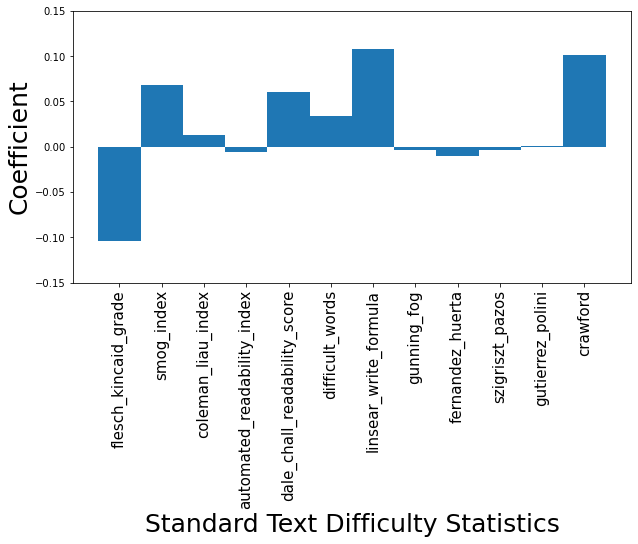

In [50]:
test = clf.coef_[0]
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.bar(range(len(test)), test, width=1)#, color='b')
ax.set_ylim([-.15, .15])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11])
ax.set_xticklabels(X_train.columns, minor=False, rotation=90, size = 15)
ax.set_ylabel('Coefficient', size=25)
ax.set_xlabel('Standard Text Difficulty Statistics', size = 25)

In [51]:
X = text_stat_data[['flesch_kincaid_grade','smog_index','dale_chall_readability_score','difficult_words','linsear_write_formula', 'crawford']]
y = text_stat_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [52]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score


clf = LogisticRegression(solver='lbfgs', multi_class='auto')
#clf.fit(X_train[0:10000], y_train[0:10000])
clf.fit(X_train, y_train)

#X_dev = vectorizer.transform(dev_df['bio'])
#y_dev = list(dev_df.nationality)

# dummy classifier for testing purposes
dummy_clf_uniform = DummyClassifier(strategy="uniform")
dummy_clf_uniform.fit(X_train, y_train)

dummy_clf_frequent = DummyClassifier(strategy="most_frequent")
dummy_clf_frequent.fit(X_train, y_train)

lr_tiny_preds = clf.predict(X_test)
rand_preds = dummy_clf_uniform.predict(X_test)
mf_preds = dummy_clf_frequent.predict(X_test)

lr_f1 = f1_score(y_test, lr_tiny_preds, average='macro')
rand_f1 = f1_score(y_test, rand_preds, average='macro')
mf_f1 = f1_score(y_test, mf_preds, average='macro')

print(lr_f1)
print(rand_f1)
print(mf_f1)

0.6525588393534192
0.49871220583466663
0.3327090651503095


Text(0.5, 0, 'Standard Text Difficulty Statistics')

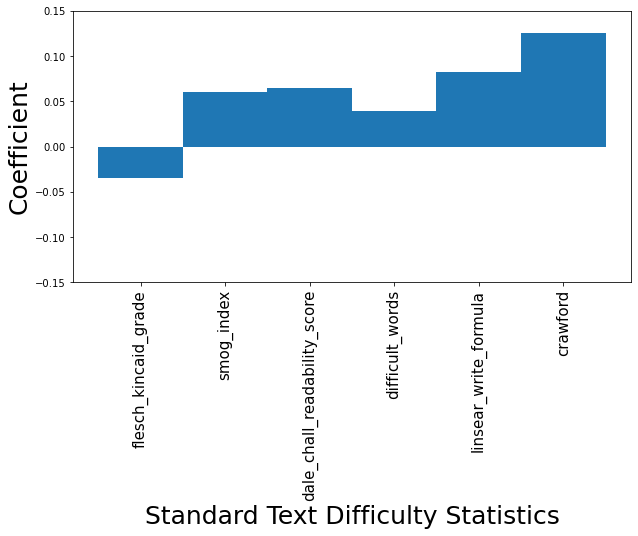

In [53]:
test = clf.coef_[0]
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.bar(range(len(test)), test, width=1)#, color='b')
ax.set_ylim([-.15, .15])
plt.xticks([0,1,2,3,4,5])
ax.set_xticklabels(['flesch_kincaid_grade','smog_index','dale_chall_readability_score','difficult_words','linsear_write_formula', 'crawford'], minor=False, rotation=90, size = 15)
ax.set_ylabel('Coefficient', size=25)
ax.set_xlabel('Standard Text Difficulty Statistics', size = 25)

In [54]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  #tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adamax',
              loss=loss_fn,
              metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping( monitor='val_loss', patience=30 )
lr_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=.5, patience=10, verbose=1 )

model.fit(X_train, y_train, epochs=5)

model.evaluate(X_test,  y_test, verbose=2)

Epoch 1/5
8727/8727 [==============================] - 6s 726us/step - loss: 0.6892 - accuracy: 0.6365
Epoch 2/5
8727/8727 [==============================] - 6s 700us/step - loss: 0.6280 - accuracy: 0.6507
Epoch 3/5
8727/8727 [==============================] - 6s 719us/step - loss: 0.6262 - accuracy: 0.6514
Epoch 4/5
8727/8727 [==============================] - 6s 659us/step - loss: 0.6256 - accuracy: 0.6522
Epoch 5/5
8727/8727 [==============================] - 6s 724us/step - loss: 0.6253 - accuracy: 0.6529
4298/4298 - 2s - loss: 0.6245 - accuracy: 0.6527


[0.6245315074920654, 0.6526822447776794]